# Cosmic Rays Formal Report

Cosmic rays are particles which strike the atmosphere of Earth and produce a so-called "particle shower" of other products produced by the energy of this impact. Typically only cosmic rays of energies $\geq 10^{9} \; \text{eV}$ are able to penetrate the Telluric magnetic field and reach the atmoshpere at all.

On Earth, a specific particle in the particle shower, the muon ($\mu$), can be detected on Earth via an experiment involving two scintilators in series with photomultiplier tubes.

The following data is from such an experiement.

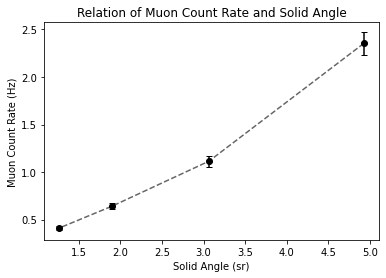

In [44]:
import matplotlib.pyplot as plt
import numpy as np

N_mu = 400 # Number of muon counts taken
L = 32*np.sqrt(2) # Length of the scintillator in centimetres.
t = np.array([170,359,622,969]) # Time interval for N_mu counts in seconds.
d = np.array([10,27,44,60]) # Distance between the scintillators in centimetres.
theta = 2*np.arctan(L/d) # Angle between opposite corners of the scintillator
Omega = 2*np.pi*(1-np.cos(theta/2)) # approximate solid angle subtended by scintillators


fig, axs = plt.subplots()
axs.set_title("Relation of Muon Count Rate and Solid Angle")
axs.set_xlabel("Solid Angle (sr)")
axs.set_ylabel("Muon Count Rate (Hz)")
axs.errorbar(Omega,N_mu/t,yerr=np.sqrt(400)/t,fmt='ko', capsize=3)
axs.plot(Omega,N_mu/t,'k--', alpha=0.6)
axs.scatter(Omega, N_mu/t, color='k', marker='o', s=5)
plt.show()

The experiment theory outlines that the expected trend between $f_{\mu}$ and $\Omega$ should be linear. It also stipulates, however, that this affect should be attenuated at higher solid angles due to muons having to travel through more atmosphere at those angles. This implies that the chart above should have a positive first difference but a negative second difference. 

Something that wasn't taken into account was the physical form of the scintillators. In the theory outlined, the scintillators were assumed to only detect particles which had travelled though the centre of mass of the two plates. This is a serious approximation, along with the fact that the scintillators were implicitly assumed to be square, while the actual scintilaton plates had dimensions of about $32\;\text{cm}$ by $50\;\text{cm}$.

In [18]:
%matplotlib notebook

In [78]:
import matplotlib.pyplot as plt
from sympy import Plane, Point3D, Line3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import random as rnd
import time

def detection(paths, scin1, scin2, instance, n_trials, d):
    """
    Takes in the paths of the muons, the planes of the two scintillators, and their spatial limits.
    Returns a Boolean array which describes whether the paths are detected by the cosmic ray detector.
    """
    scindet = []
    
    print("Checking for scintillator detections (d={}, trial {}/{}) ...".format(d, instance+1, n_trials))
    print("\r")
    for i, path in enumerate(paths):
        if(-L/2 <= scin1.intersection(mu_paths[i])[0].x <= L/2 and
           -L/2 <= scin1.intersection(mu_paths[i])[0].y <= L/2):
            if(-L/2 <= scin2.intersection(mu_paths[i])[0].x <= L/2 and
               -L/2 <= scin2.intersection(mu_paths[i])[0].y <= L/2):
                scindet.append(True)
            else:
                scindet.append(False)
        else:
            scindet.append(False)
            
    return scindet
    
def trials(N, d, instance, n_trials):
    mu_paths = []
    
    L = 100 # Side-length of scintillator

    gen_d = 50 # Distance above the scintillator COM at which the muons are generated

    # Generate N particles with random positions and downward-pointing velocities.
    print("Generating muon kinematics (d={} trial {}/{}) ...".format(d, instance+1, n_trials))
    r_mu = [[rnd.uniform(-50,50), rnd.uniform(-50,50), rnd.uniform(30,50)] for i in range(N)]
    v_mu = np.array([[rnd.uniform(-1,1), rnd.uniform(-1,1), rnd.uniform(-1,0)] for i in range(N)])
    # Create the paths for the muons
    print("Calculating muon paths (d={}, trial {}/{}) ...".format(d, instance+1, n_trials))
    mu_paths = [Line3D(Point3D(r_mu[i]), Point3D(r_mu[i] + v_mu[i])) for i in range(N)]

    # Define the position of the scintillator corners
    scin1_corners= np.array([[L/2,L/2,d],[L/2,-L/2,d],[-L/2,-L/2,d],[-L/2,L/2,d]])
    scin2_corners = np.array([[L/2,L/2,-d],[L/2,-L/2,-d],[-L/2,-L/2,-d],[-L/2,L/2,-d]])

    # Define the planes of the scintillator plates
    scin1_plane = Plane(Point3D(scin1_corners[0]),Point3D(scin1_corners[1]),Point3D(scin1_corners[2]))
    scin2_plane = Plane(Point3D(scin2_corners[0]),Point3D(scin2_corners[1]),Point3D(scin2_corners[2]))

    #========
    #DATA
    #========
    #detections = detection(mu_paths,scin1_plane,scin2_plane)
    return np.sum(detection(mu_paths, scin1_plane, scin2_plane, instance, n_trials, d))

N = 500 # Number of muons
n_distances = 2 #Number of distances to test
n_trials = 2 #Trials per inter-planar spacing
d_start = 0
d_end = 5
d = np.linspace(d_start, d_end, n_distances) #List of inter-planar distances, linearly spaced from start to end.
mu_trials = [] #List of trials at different distances
for i in range(n_distances):
    mu_events = [] #List of events in a given triaL
    for j in range(n_trials):
        mu_events.append(trials(N, d[i], j, n_trials))
        print(trials(N, d[i], j, n_trials))
    mu_trials.append(mu_events)
    
mu_trials = np.array(mu_trials)
print("\r")
print("Muons: {}".format(N))
print(d)
print(mu_trials)
#print("Mean Muon Events for d={}: {}".format(d[0],np.mean(mu_events)))
#print("Standard Deviation of Muon Events: {}".format(np.std(mu_events)))

#========
#PLOTTING
#========
"""
print("Plotting muon trajectories...")
ax = plt.axes(projection="3d")

#Create the scintilator plates
plate1 = ax.add_collection3d(Poly3DCollection([scin1_corners], edgecolor='k', color='k', alpha=0.2))
plate2 = ax.add_collection3d(Poly3DCollection([scin2_corners], edgecolor='k', color='k', alpha=0.2))

#Plot the muon pathlines
for i in range(N):
    if detections[i] == True:
        ax.plot([r_mu[i][0],scin2_plane.intersection(mu_paths[i])[0].x],
                [r_mu[i][1],scin2_plane.intersection(mu_paths[i])[0].y], 
                [r_mu[i][2],scin2_plane.intersection(mu_paths[i])[0].z],
                color='r', alpha=1)
    else:
        ax.plot([r_mu[i][0],scin2_plane.intersection(mu_paths[i])[0].x],
                [r_mu[i][1],scin2_plane.intersection(mu_paths[i])[0].y], 
                [r_mu[i][2],scin2_plane.intersection(mu_paths[i])[0].z],
                color='k', alpha=0.025)

ax.set_zlim(-10,50)
ax.set_ylim(-25,25)
ax.set_xlim(-25,25)
ax.set_axis_off()

#========
#READ-OUT
#========
print("Muon Events: {}".format(np.sum(detections)))
"""

Generating muon kinematics (d=0.0 trial 1/2) ...
Calculating muon paths (d=0.0, trial 1/2) ...
Checking for scintillator detections (d=0.0, trial 1/2) ...

Generating muon kinematics (d=0.0 trial 1/2) ...
Calculating muon paths (d=0.0, trial 1/2) ...


KeyboardInterrupt: 